In [2]:
# Hello World
# import library
import tensorflow as tf
# Create a Constant op
hello = tf.constant('Hello, TensorFlow!')
# Start tf session
sess = tf.Session()
# Run graph
print(sess.run(hello))

b'Hello, TensorFlow!'


In [6]:
# Basic Operations

a = tf.constant(2)
b = tf.constant(3)
# Launch the default graph.
with tf.Session() as sess:
    print("a: %i" % sess.run(a), "b: %i" % sess.run(b))
    print("Addition with constants: %i" % sess.run(a+b))
    print("Multiplication with constants: %i" % sess.run(a*b))

# input by the user
a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)

# Define some operations
add = tf.add(a, b)
mul = tf.multiply(a, b)

# Launch the default graph.
with tf.Session() as sess:
    # Run every operation with variable input
    print("Addition with variables: %i" % sess.run(add, feed_dict={a: 2, b: 3}))
    print("Multiplication with variables: %i" % sess.run(mul, feed_dict={a: 2, b: 3}))
    
# Matrix Multiplication
matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2.],[2.]])
product = tf.matmul(matrix1, matrix2)

with tf.Session() as sess:
    result = sess.run(product)
    print(result)
    

a: 2 b: 3
Addition with constants: 5
Multiplication with constants: 6
Addition with variables: 5
Multiplication with variables: 6
[[ 12.]]


In [7]:
# knn model

import numpy as np
import tensorflow as tf

# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


# In this example, we limit mnist data
Xtr, Ytr = mnist.train.next_batch(5000) #5000 for training (nn candidates)
Xte, Yte = mnist.test.next_batch(200) #200 for testing

# tf Graph Input
xtr = tf.placeholder("float", [None, 784])
xte = tf.placeholder("float", [784])

# Nearest Neighbor calculation using L1 Distance
# Calculate L1 Distance
distance = tf.reduce_sum(tf.abs(tf.add(xtr, tf.negative(xte))), reduction_indices=1)
# Prediction: Get min distance index (Nearest neighbor)
pred = tf.arg_min(distance, 0)

accuracy = 0.

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # loop over test data
    for i in range(len(Xte)):
        # Get nearest neighbor
        nn_index = sess.run(pred, feed_dict={xtr: Xtr, xte: Xte[i, :]})
        # Get nearest neighbor class label and compare it to its true label
        print("Test", i, "Prediction:", np.argmax(Ytr[nn_index]), \
            "True Class:", np.argmax(Yte[i]))
        # Calculate accuracy
        if np.argmax(Ytr[nn_index]) == np.argmax(Yte[i]):
            accuracy += 1./len(Xte)
    print("Done!")
    print("Accuracy:", accuracy)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Test 0 Prediction: 7 True Class: 7
Test 1 Prediction: 2 True Class: 2
Test 2 Prediction: 1 True Class: 1
Test 3 Prediction: 0 True Class: 0
Test 4 Prediction: 4 True Class: 4
Test 5 Prediction: 1 True Class: 1
Test 6 Prediction: 4 True Class: 4
Test 7 Prediction: 9 True Class: 9
Test 8 Prediction: 8 True Class: 5
Test 9 Prediction: 9 True Class: 9
Test 10 Prediction: 0 True Class: 0
Test 11 Prediction: 0 True Class: 6
Test 12 Prediction: 9 True Class: 9
Test 13 Prediction: 0 True Class: 0
Test 14 Prediction: 1 True Class: 1
Test 15 Prediction:

Epoch: 0050 cost= 0.084687769 W= 0.298822 b= 0.447323
Epoch: 0100 cost= 0.083795324 W= 0.295894 b= 0.468386
Epoch: 0150 cost= 0.083006114 W= 0.29314 b= 0.488196
Epoch: 0200 cost= 0.082308233 W= 0.29055 b= 0.506827
Epoch: 0250 cost= 0.081691101 W= 0.288114 b= 0.524351
Epoch: 0300 cost= 0.081145421 W= 0.285823 b= 0.540832
Epoch: 0350 cost= 0.080662884 W= 0.283668 b= 0.556334
Epoch: 0400 cost= 0.080236189 W= 0.281642 b= 0.570914
Epoch: 0450 cost= 0.079858959 W= 0.279736 b= 0.584627
Epoch: 0500 cost= 0.079525404 W= 0.277943 b= 0.597524
Epoch: 0550 cost= 0.079230458 W= 0.276256 b= 0.609656
Epoch: 0600 cost= 0.078969762 W= 0.274671 b= 0.621063
Epoch: 0650 cost= 0.078739263 W= 0.273179 b= 0.631792
Epoch: 0700 cost= 0.078535505 W= 0.271777 b= 0.641882
Epoch: 0750 cost= 0.078355379 W= 0.270457 b= 0.651373
Epoch: 0800 cost= 0.078196160 W= 0.269216 b= 0.660301
Epoch: 0850 cost= 0.078055397 W= 0.26805 b= 0.668696
Epoch: 0900 cost= 0.077931009 W= 0.266952 b= 0.676592
Epoch: 0950 cost= 0.077821031 W

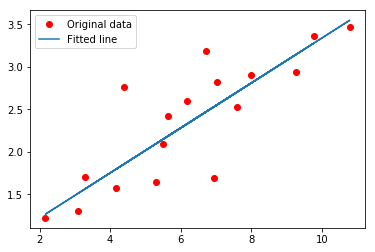

In [9]:
# linear regression model
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [10]:
# logistic regression model

# Parameters
learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_step = 1

# tf Graph Input
x = tf.placeholder(tf.float32, [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder(tf.float32, [None, 10]) # 0-9 digits recognition => 10 classes

# Set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Construct model
pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax

# Minimize error using cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Fit training using batch data
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs,
                                                          y: batch_ys})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))

    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy for 3000 examples
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images[:3000], y: mnist.test.labels[:3000]}))

Epoch: 0001 cost= 1.183631610
Epoch: 0002 cost= 0.664262590
Epoch: 0003 cost= 0.552666119
Epoch: 0004 cost= 0.498312637
Epoch: 0005 cost= 0.465612526
Epoch: 0006 cost= 0.443138899
Epoch: 0007 cost= 0.425522115
Epoch: 0008 cost= 0.412097836
Epoch: 0009 cost= 0.401667477
Epoch: 0010 cost= 0.393848136
Epoch: 0011 cost= 0.382010629
Epoch: 0012 cost= 0.378736995
Epoch: 0013 cost= 0.373492159
Epoch: 0014 cost= 0.367074980
Epoch: 0015 cost= 0.361369377
Epoch: 0016 cost= 0.361139760
Epoch: 0017 cost= 0.353623811
Epoch: 0018 cost= 0.350017284
Epoch: 0019 cost= 0.349614258
Epoch: 0020 cost= 0.346005117
Epoch: 0021 cost= 0.342044737
Epoch: 0022 cost= 0.338777304
Epoch: 0023 cost= 0.338330821
Epoch: 0024 cost= 0.336146063
Epoch: 0025 cost= 0.331902856
Optimization Finished!
Accuracy: 0.89


In [12]:
# convolutional network model

# Parameters
learning_rate = 0.001
training_iters = 200000
batch_size = 128
display_step = 10

# Network Parameters
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)
dropout = 0.75 # Dropout, probability to keep units

# tf Graph input
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])
keep_prob = tf.placeholder(tf.float32) #dropout (keep probability)

# Create some wrappers for simplicity
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')


# Create model
def conv_net(x, weights, biases, dropout):
    # Reshape input picture
    x = tf.reshape(x, shape=[-1, 28, 28, 1])

    # Convolution Layer
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Max Pooling (down-sampling)
    conv1 = maxpool2d(conv1, k=2)

    # Convolution Layer
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max Pooling (down-sampling)
    conv2 = maxpool2d(conv2, k=2)

    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Apply Dropout
    fc1 = tf.nn.dropout(fc1, dropout)

    # Output, class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

# Store layers weight & bias
weights = {
    # 5x5 conv, 1 input, 32 outputs
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32])),
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    # fully connected, 7*7*64 inputs, 1024 outputs
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])),
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([1024, n_classes]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# Construct model
pred = conv_net(x, weights, biases, keep_prob)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Evaluate model
correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    step = 1
    # Keep training until reach max iterations
    while step * batch_size < training_iters:
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop)
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y,
                                       keep_prob: dropout})
        if step % display_step == 0:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x,
                                                              y: batch_y,
                                                              keep_prob: 1.})
            print("Iter " + str(step*batch_size) + ", Minibatch Loss= " + \
                  "{:.6f}".format(loss) + ", Training Accuracy= " + \
                  "{:.5f}".format(acc))
        step += 1
    print("Optimization Finished!")

    # Calculate accuracy for 256 mnist test images
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={x: mnist.test.images[:256],
                                      y: mnist.test.labels[:256],
                                      keep_prob: 1.}))

Iter 1280, Minibatch Loss= 22949.685547, Training Accuracy= 0.25000
Iter 2560, Minibatch Loss= 8314.550781, Training Accuracy= 0.53906
Iter 3840, Minibatch Loss= 6899.398926, Training Accuracy= 0.67188
Iter 5120, Minibatch Loss= 3678.613525, Training Accuracy= 0.78906
Iter 6400, Minibatch Loss= 2737.688721, Training Accuracy= 0.80469
Iter 7680, Minibatch Loss= 2225.326904, Training Accuracy= 0.86719
Iter 8960, Minibatch Loss= 2901.610107, Training Accuracy= 0.80469
Iter 10240, Minibatch Loss= 2414.794189, Training Accuracy= 0.87500
Iter 11520, Minibatch Loss= 2058.649658, Training Accuracy= 0.88281
Iter 12800, Minibatch Loss= 1320.031982, Training Accuracy= 0.88281
Iter 14080, Minibatch Loss= 1671.514771, Training Accuracy= 0.89062
Iter 15360, Minibatch Loss= 1750.470093, Training Accuracy= 0.86719
Iter 16640, Minibatch Loss= 1743.327637, Training Accuracy= 0.86719
Iter 17920, Minibatch Loss= 1253.091797, Training Accuracy= 0.92188
Iter 19200, Minibatch Loss= 1685.619385, Training Accu

Iter 157440, Minibatch Loss= 152.197647, Training Accuracy= 0.98438
Iter 158720, Minibatch Loss= 217.270432, Training Accuracy= 0.97656
Iter 160000, Minibatch Loss= 137.869995, Training Accuracy= 0.99219
Iter 161280, Minibatch Loss= 178.143402, Training Accuracy= 0.97656
Iter 162560, Minibatch Loss= 0.000000, Training Accuracy= 1.00000
Iter 163840, Minibatch Loss= 214.566513, Training Accuracy= 0.94531
Iter 165120, Minibatch Loss= 61.067631, Training Accuracy= 0.98438
Iter 166400, Minibatch Loss= 187.943207, Training Accuracy= 0.97656
Iter 167680, Minibatch Loss= 256.870850, Training Accuracy= 0.96875
Iter 168960, Minibatch Loss= 46.615784, Training Accuracy= 0.99219
Iter 170240, Minibatch Loss= 0.326141, Training Accuracy= 0.99219
Iter 171520, Minibatch Loss= 44.093201, Training Accuracy= 0.97656
Iter 172800, Minibatch Loss= 129.367828, Training Accuracy= 0.97656
Iter 174080, Minibatch Loss= 377.065186, Training Accuracy= 0.94531
Iter 175360, Minibatch Loss= 170.832031, Training Accur

In [14]:
# recurrent neural network model
from tensorflow.contrib import rnn

# Parameters
learning_rate = 0.001
training_iters = 100000
batch_size = 128
display_step = 10

# Network Parameters
n_input = 28 # MNIST data input (img shape: 28*28)
n_steps = 28 # timesteps
n_hidden = 128 # hidden layer num of features
n_classes = 10 # MNIST total classes (0-9 digits)

# tf Graph input
x = tf.placeholder("float", [None, n_steps, n_input])
y = tf.placeholder("float", [None, n_classes])

# Define weights
weights = {
    'out': tf.Variable(tf.random_normal([n_hidden, n_classes]))
}
biases = {
    'out': tf.Variable(tf.random_normal([n_classes]))
}

def RNN(x, weights, biases):

    # Prepare data shape to match `rnn` function requirements
    # Current data input shape: (batch_size, n_steps, n_input)
    # Required shape: 'n_steps' tensors list of shape (batch_size, n_input)
    
    # Unstack to get a list of 'n_steps' tensors of shape (batch_size, n_input)
    x = tf.unstack(x, n_steps, 1)

    # Define a lstm cell with tensorflow
    lstm_cell = rnn.BasicLSTMCell(n_hidden, forget_bias=1.0)

    # Get lstm cell output
    outputs, states = rnn.static_rnn(lstm_cell, x, dtype=tf.float32)

    # Linear activation, using rnn inner loop last output
    return tf.matmul(outputs[-1], weights['out']) + biases['out']

pred = RNN(x, weights, biases)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Evaluate model
correct_pred = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    step = 1
    # Keep training until reach max iterations
    while step * batch_size < training_iters:
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Reshape data to get 28 seq of 28 elements
        batch_x = batch_x.reshape((batch_size, n_steps, n_input))
        # Run optimization op (backprop)
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
        if step % display_step == 0:
            # Calculate batch accuracy
            acc = sess.run(accuracy, feed_dict={x: batch_x, y: batch_y})
            # Calculate batch loss
            loss = sess.run(cost, feed_dict={x: batch_x, y: batch_y})
            print("Iter " + str(step*batch_size) + ", Minibatch Loss= " + \
                  "{:.6f}".format(loss) + ", Training Accuracy= " + \
                  "{:.5f}".format(acc))
        step += 1
    print("Optimization Finished!")

    # Calculate accuracy for 128 mnist test images
    test_len = 128
    test_data = mnist.test.images[:test_len].reshape((-1, n_steps, n_input))
    test_label = mnist.test.labels[:test_len]
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={x: test_data, y: test_label}))

Iter 1280, Minibatch Loss= 2.105906, Training Accuracy= 0.21094
Iter 2560, Minibatch Loss= 1.799792, Training Accuracy= 0.37500
Iter 3840, Minibatch Loss= 1.567945, Training Accuracy= 0.42969
Iter 5120, Minibatch Loss= 1.227663, Training Accuracy= 0.58594
Iter 6400, Minibatch Loss= 1.116256, Training Accuracy= 0.65625
Iter 7680, Minibatch Loss= 0.873246, Training Accuracy= 0.70312
Iter 8960, Minibatch Loss= 0.784604, Training Accuracy= 0.69531
Iter 10240, Minibatch Loss= 0.643670, Training Accuracy= 0.77344
Iter 11520, Minibatch Loss= 0.470302, Training Accuracy= 0.85156
Iter 12800, Minibatch Loss= 0.395306, Training Accuracy= 0.87500
Iter 14080, Minibatch Loss= 0.417268, Training Accuracy= 0.85938
Iter 15360, Minibatch Loss= 0.407420, Training Accuracy= 0.86719
Iter 16640, Minibatch Loss= 0.612570, Training Accuracy= 0.78125
Iter 17920, Minibatch Loss= 0.311140, Training Accuracy= 0.89062
Iter 19200, Minibatch Loss= 0.351058, Training Accuracy= 0.88281
Iter 20480, Minibatch Loss= 0.24